In [1]:
import pandas as pd
import os
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/iremnurtokuroglu/credit-score-classification-cleaned-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)


Skipping, found downloaded files in "./credit-score-classification-cleaned-dataset" (use force=True to force download)


In [3]:
data1 = pd.read_csv('credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv')

unique_count = data1['customer_id'].nunique()
print(unique_count)


12500


In [4]:
data = pd.read_csv('credit-score-classification/train.csv')
data.head()

/var/folders/p8/741y300n6c59wc3r73lffn200000gn/T/ipykernel_61412/2423218816.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('credit-score-classification/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
nullCounts = data.isnull().sum()
print(nullCounts)

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [6]:
dataCleaned = data.dropna()

In [7]:
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_

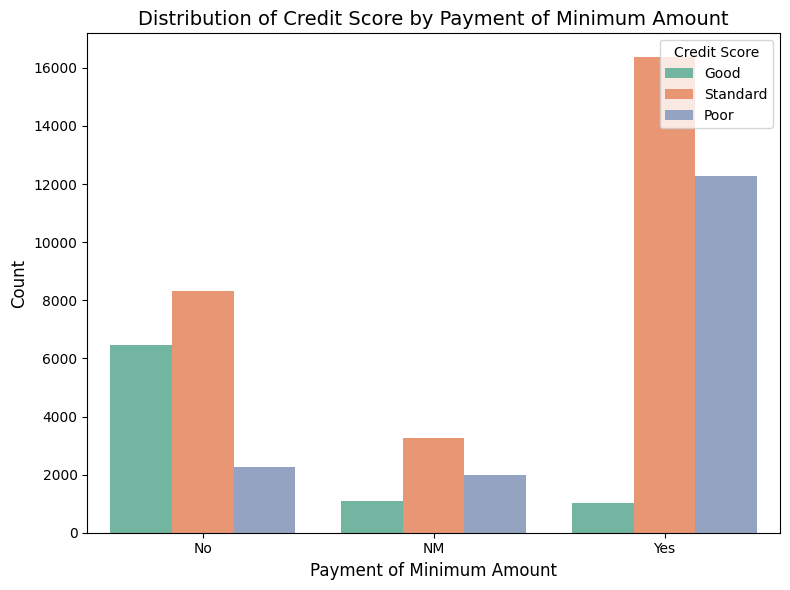

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataCleaned, x='Payment_of_Min_Amount', hue='Credit_Score', palette='Set2')
plt.title('Distribution of Credit Score by Payment of Minimum Amount', fontsize=14)
plt.xlabel('Payment of Minimum Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Credit Score', loc='upper right')
plt.tight_layout()
plt.show()